In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 大规模机器学习(Large Scale Machine Learning)
- 首先是必要性，如果只用少量训练集也能获得不错的效果，没有必要做大规模的训练，我们可以用学习曲线来帮助判断。
- 如果我们一定需要一个大规模的训练集，我们可以尝试使用**随机梯度下降法**来代替批量梯度下降法。

### 随机梯度下降
随机梯度下降算法首先对训练集随机“洗牌”。定义代价函数为一个单一训练实例的代价函数（**可以与week1中代价函数做个比较，随机梯度下降是没有求和步骤的**）:
$$cost(\theta, (x^{(i)}, y^{(i)})) = \frac{1}{2}(h_{\theta}(x^{(i)})-y^{(i)})^2$$
迭代的梯度是：
$$
\theta: =\theta _j - \alpha(h_\theta(x^{(i)}) - y^{(i)}) {x_j}^{(i)}
$$

随机梯度下降算法在每一次计算之后便更新参数 $\theta$，**而不需要首先将所有的训练集求和**——**随机梯度下降法在每次迭代中只使用一个数据点随机选取的样本来计算梯度并更新参数**。在梯度下降算法还没有完成一次迭代时，随机梯度下降算法便已经走出了很远。但是这样的算法存在的问题是，不是每一步都是朝着”正确”的方向迈出的。因此算法虽然会逐渐走向全局最小值的位置，但是可能无法站到那个最小值的那一点，而是在最小值点附近徘徊。

In [3]:
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), x] 
learning_rate = 0.1
n_iterations = 1000

# 梯度下降法实现
theta_gd = np.random.randn(2,1)  # 随机初始化参数

for iteration in range(n_iterations):
    gradients = 2/len(X_b) * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd -= learning_rate * gradients

# 随机梯度下降法实现
theta_sgd = np.random.randn(2,1)  # 随机初始化参数

for iteration in range(n_iterations):
    for i in range(len(X_b)):
        random_index = np.random.randint(len(X_b))  # 随机选择一个样本
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        theta_sgd -= learning_rate * gradients

print("梯度下降法得到的参数：", theta_gd)
print("随机梯度下降法得到的参数：", theta_sgd)

梯度下降法得到的参数： [[4.21509616]
 [2.77011339]]
随机梯度下降法得到的参数： [[3.6200518 ]
 [2.46679312]]


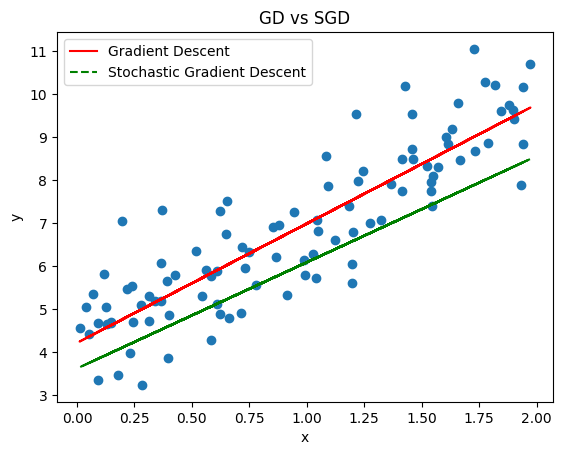

In [4]:
plt.scatter(x, y, marker='o')
plt.plot(x, X_b.dot(theta_gd), 'r-', label="Gradient Descent")
plt.plot(x, X_b.dot(theta_sgd), 'g--', label="Stochastic Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("GD vs SGD")
plt.show()

随机梯度下降算法收敛效果是**颠簸不平的**。在随机梯度下降（SGD）中**调整学习率$\alpha$是一种常见的策略**来加速收敛并提高稳定性.

$$\alpha(t) = \frac{\text{const}_1}{t + \text{const}_2}$$

其中：
- $\alpha(t)$ 是第 $t$ 次迭代的学习率。
- $\text{const}_1$ 和 $\text{const}_2$ 是常量，用于控制学习率的初始值和衰减速度。
- $t$ 是当前迭代次数。

这种方法可以帮助模型在初期快速接近最优值，然后逐步减小步长以在接近最优解时稳定收敛。


拟合的参数： [[4.24038078]
 [3.34658244]]


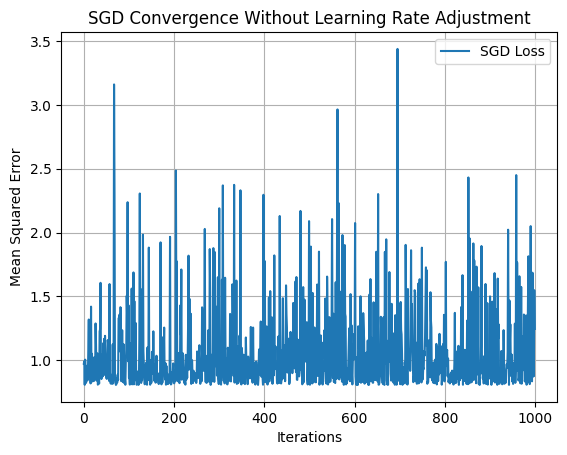

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 创建数据集
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# 添加截距（偏置）项
X_b = np.c_[np.ones((100, 1)), x]

# 超参数
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
batch_size = 20

loss_sgd = []
loss_mb = []

# 随机梯度下降
theta_sgd = np.random.randn(2, 1)  # 随机初始化参数

for iteration in range(n_iterations):
    # SGD
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        theta_sgd -= learning_rate * gradients
        
    # 记录损失
    predictions_sgd = X_b.dot(theta_sgd)
    loss_sgd.append(np.mean((predictions_sgd - y) ** 2))

print("拟合的参数：", theta_sgd)
# 绘制损失收敛轨迹
plt.plot(loss_sgd, label="SGD Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("SGD Convergence Without Learning Rate Adjustment")
plt.grid(True)
plt.show()


拟合的参数： [[4.22136637]
 [2.77170037]]


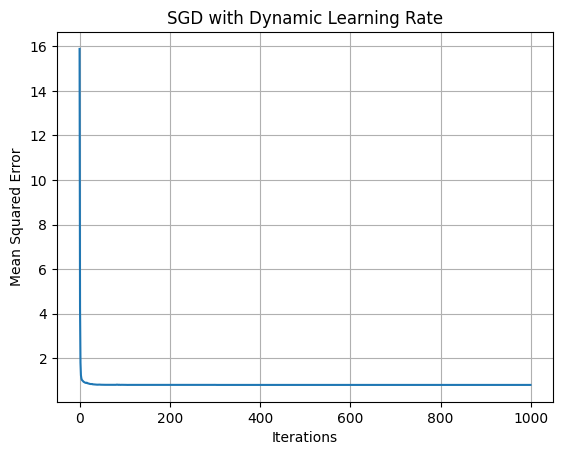

In [17]:
const1 = 0.1
const2 = 50
theta = np.random.randn(2, 1)

# 动态学习率的SGD
loss_history = []

for iteration in range(n_iterations):
    # 动态调整学习率
    learning_rate = const1 / (iteration + const2)

    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients

    # 计算损失
    predictions = X_b.dot(theta)
    loss = np.mean((predictions - y) ** 2)
    loss_history.append(loss)

print("拟合的参数：", theta)
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("SGD with Dynamic Learning Rate")
plt.grid(True)
plt.show()

### 小批量梯度下降

小批量梯度下降算法是介于批量梯度下降算法和随机梯度下降算法之间的算法。
- 它在每次参数更新时使用数据中的一个小批量，而不是整个数据集或单个样本，这样可以进行更高效的计算，适合在大数据集上的梯度学习。
- 迭代梯度
  
$$\theta := \theta - \alpha \frac{1}{b} \sum_{k=0}^{b} \left( h_\theta (x^{(k)}) - y^{(k)} \right) x_j^{(k)}$$

  - $\theta$ 是模型参数。
  - $\alpha$ 是学习率（步长）。
  - $b$ 是小批量的样本数。
  - $h_\theta (x^{(k)})$ 是用当前参数预测的样本值。
  - $x_j^{(k)}$ 是第 $(k)$ 个样本的第 $j$ 特征。
  - 每步更新时计算从 $b$ 个小批量样本的平均梯度。

In [14]:
# 还是刚才的例子
learning_rate = 0.1
n_iterations = 100
batch_size = 20  # 批量大小
m = len(X_b)


theta = np.random.randn(2, 1)  
loss_history = []

for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i + batch_size]
        yi = y_shuffled[i:i + batch_size]
        gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients
        
    # 计算损失
    predictions = X_b.dot(theta)
    loss = np.mean((predictions - y) ** 2)
    loss_history.append(loss)

print("拟合的参数：", theta)

拟合的参数： [[4.22476746]
 [2.7720768 ]]


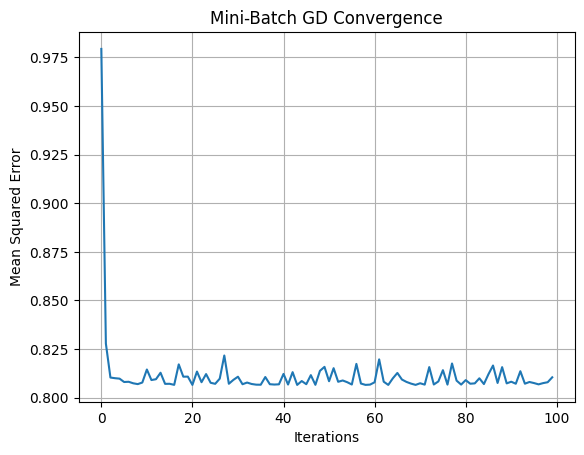

In [12]:
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Mini-Batch GD Convergence")
plt.grid(True)
plt.show()

# 在线学习 Online Learning
在线学习机制让我们可以模型化问题。**在线学习算法指的是对数据流而非离线的静态数据集的学习**。许多在线网站都有持续不断的用户流，对于每一个用户，网站希望能在不将数据存储到数据库中便顺利地进行算法学习。一旦对一个数据的学习完成了，我们便可以丢弃该数据，不需要再存储它了。这种方式的好处在于，我们的算法可以很好的适应用户的倾向性，算法可以针对用户的当前行为不断地更新模型以适应该用户。